In [1]:
%run prophet_funcs_v1.py

In [130]:
import pandas as pd
import time
from datetime import timedelta

#get the time now in unix time
now = int(time.time())

#get the time one year from now datetime object
day_lag = datetime.today() - timedelta(days = 120 )

#convert datetime object to unix timestamp
then = int(day_lag.timestamp())

url = {
    'SOL': F'https://query1.finance.yahoo.com/v7/finance/download/SOL1-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true',
    'ETH': F'https://query1.finance.yahoo.com/v7/finance/download/ETH-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true',
    'XRP': F'https://query1.finance.yahoo.com/v7/finance/download/XRP-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true',
    'BTC': F'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true'
}




In [1]:
'''Function to fetch data from yahoo via url dictionary of Ticker and Url'''

def fetchData(url):
    df = pd.DataFrame()
    for i in url.items():
        key = i[0] #get the Key values from dictionary in this case Crypto Ticker
        val = i[1] #get the Value object from dictionary in this case Crypto Url
        data = pd.read_csv(val)
        data = data.assign(token = key) 
        df = df.append(data)
    return(df)


#df2 = fetchData(url)

# Try yFinance yahoo api

In [2]:
'''
Return data frame
'''

import yfinance as yf
import pandas as pd

tickerStrings = ['SOL1-USD','BTC-USD']

#start = 
period = '1mo'

vars = tickerStrings,period

def FetchData(vars):
    tickerStrings,period = vars
    df_list = list()
    for ticker in tickerStrings:
        data = yf.download(ticker, group_by="Ticker", period = period)
        data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
        df_list.append(data)
        df = pd.concat(df_list) # combine all dataframes into a single dataframe
    return(df)
                                

df = FetchData(vars)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
sample_dict['BTC-USD'].tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,36124731509
2021-11-04,62941.804688,63123.289062,60799.664062,61452.230469,61452.230469,32615846901
2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,30605102446
2021-11-06,61068.875000,61590.683594,60163.781250,61527.480469,61527.480469,29094934221
2021-11-07,61528.199219,63101.496094,61432.488281,63052.953125,63052.953125,24366667776


# Python Widgets for plots

In [18]:
import ipywidgets as ipyw
import yfinance as yf
import pandas as pd

#df_dict = {}

@ipyw.interact_manual (
tickerStrings= ipyw.widgets.SelectMultiple(
    options= ['SOL1-USD','BTC-USD','ETH-USD','1INCH-USD','ADA-USD'],
    value= ['SOL1-USD','BTC-USD','ETH-USD','1INCH-USD','ADA-USD']),
period= ['1d','5d','1mo','3mo','6mo','1y','2y','5y','10y','ytd','max']
)



def FetchData_dict(tickerStrings,period):
    global df_dict
    df_list = list()
    for ticker in tickerStrings:
        data = yf.download(ticker, group_by="Ticker", period = period)
        data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
        df_list.append(data)
        df = pd.concat(df_list) # combine all dataframes into a single dataframe
        df_dict = {value: df[df['ticker'] == value].drop('ticker', axis=1) for value in df['ticker'].unique()}



interactive(children=(SelectMultiple(description='tickerStrings', index=(0, 1, 2, 3, 4), options=('SOL1-USD', …

In [19]:
import ipywidgets as ipyw
import mplfinance as mpf

tickers = list(df_dict)

@ipyw.interact (
Mavg = ipyw.widgets.Dropdown(options=[('5Day', 5), ('10Day', 10), ('30Day', 30)],description='Moving_Average:'),
MA = True,
Tickers = tickers,
Plot_Type = ['hollow_and_filled','ohlc','line','renko','pnf']
)

def PlotIt(Tickers,Plot_Type,MA,Mavg):
    if MA == True:
      Mavg
      mpf.plot(df_dict[Tickers],type = Plot_Type,volume = True,mav = Mavg,figratio = (100,40),style = 'yahoo',title = (Tickers + ' Plot With Moving Average'))
    else:
      mpf.plot(df_dict[Tickers],type = Plot_Type,volume = True,figratio = (100,40),style = 'yahoo',title = Tickers)
        

interactive(children=(Dropdown(description='Tickers', options=('SOL1-USD', 'BTC-USD', 'ETH-USD', '1INCH-USD', …

# Compare all returns

In [20]:
#Create DataFrame from close data
import pandas as pd

close = pd.DataFrame()

for a in df_dict:
    cl = pd.DataFrame(df_dict[a],columns=['Close'])
    cl = cl.rename(columns={'Close': a }).reset_index(level=0).set_index('Date')
    close = pd.concat([close,cl],axis = 1)

close = close.reset_index(level = 0)


In [5]:
#Scale close data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

v = close.iloc[:, 1:] #Ignore Date column and grab all others
d = pd.DataFrame(close['Date']) #Get Date Column
c_scaled = pd.DataFrame(scaler.fit_transform(v)) # Scale close data
t = list(close.iloc[:0, 1:]) #get column names(tickers) from original data
c_scaled = c_scaled.set_axis(t, axis = 1) #reset column names after scaling
close_scaled = pd.concat([d,c_scaled], axis = 1) #combine data into new dataframe

In [6]:
import plotly.express as px
#df = px.data.stocks()
fig = px.line(close_scaled, x="Date", y=close_scaled.columns,
              hover_data={"Date": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

# Preprocessing
Preprocessing of close data for trainning and prediction with Meta Prophet 

In [21]:
@ipyw.interact_manual (Tickers = tickers)

def munge(Tickers):
    global df
    df = close[['Date',Tickers]]   #Create new dataframe with Date and Ticker columns based on selected ticker
    df = df.rename(columns={'Date':'ds', Tickers: 'y'}) #rename columns
    df = df.dropna()#remove nan values
    df = datecheck(df)
    return(df.head())

interactive(children=(Dropdown(description='Tickers', options=('SOL1-USD', 'BTC-USD', 'ETH-USD', '1INCH-USD', …

# Quick Prediction

In [29]:
from prophet import Prophet
m = Prophet() #Create Prophet object
m.fit(df) #Fit Prophet model
future = m.make_future_dataframe(periods=90) #Create future dataframe
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -13.6482


,ds
503,2022-05-12
504,2022-05-13
505,2022-05-14
506,2022-05-15
507,2022-05-16


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       598.288    0.00379335       68.6493           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       599.131    0.00156923       69.1471   2.771e-05       0.001      189  LS failed, Hessian reset 
     137       599.925   0.000105892       57.8552   2.139e-06       0.001      248  LS failed, Hessian reset 
     156       599.933   4.44649e-05       65.5383   7.313e-07       0.001      313  LS failed, Hessian reset 
     191       599.935     5.305e-08       65.0151      0.1694           1      370   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [30]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
503,2022-05-12,0.281226,-1.195922,1.650762
504,2022-05-13,0.236234,-1.157371,1.603979
505,2022-05-14,0.228639,-1.219945,1.574597
506,2022-05-15,0.190223,-1.261895,1.451856
507,2022-05-16,0.145859,-1.344849,1.572872


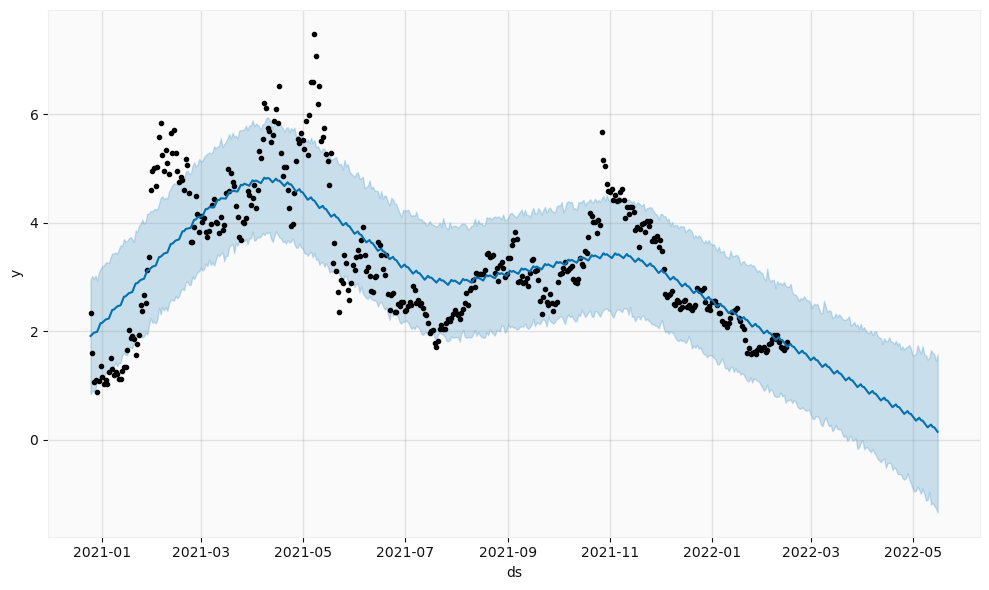

In [31]:
fig1 = m.plot(forecast)

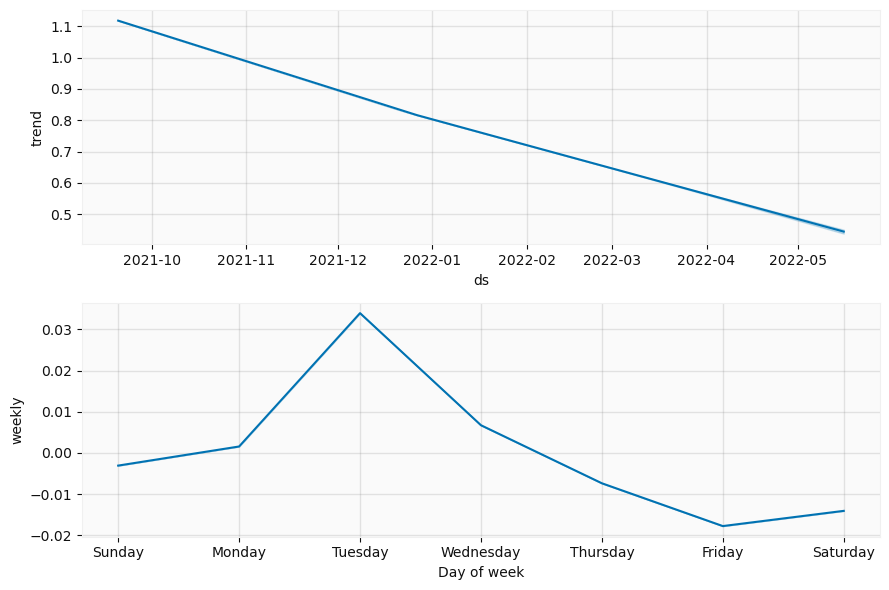

In [25]:
fig2 = m.plot_components(forecast)
